<a href="https://colab.research.google.com/github/VictorL85/Licitacao/blob/main/Licitacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install basedosdados

In [ ]:
import pandas as pd
import basedosdados as bd
from pandas_gbq import read_gbq
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
billing_id = 'ebac-472003'

query = """
  SELECT
    dados.id_licitacao as id_licitacao,
    dados.descricao_item as descricao_item,
    dados.quantidade_item as quantidade_item,
    dados.valor_item as valor_item
FROM `basedosdados.br_cgu_licitacao_contrato.licitacao_item` AS dados
LIMIT 1000
"""

df_item = bd.read_sql(query = query, billing_project_id = billing_id)

Downloading: 100%|██████████|


In [ ]:
df_item = df_item.dropna()
df_item.isnull().sum()

,0
id_licitacao,0
descricao_item,0
quantidade_item,0
valor_item,0


In [ ]:
for col in ['descricao_item']:
    if col in df_item.columns:
        df_item[col] = df_item[col].str.title().str.strip()

In [ ]:
df_item.duplicated().sum()

np.int64(5)

In [ ]:
df_item = df_item.drop_duplicates()
df_item.duplicated().sum()

np.int64(0)

In [ ]:
df_item['quantidade_item'] = df_item['quantidade_item'].astype('Int64')

In [ ]:
df_item['descricao_item'] = df_item['descricao_item'].astype(str)

In [ ]:
print("Tipos de dados do df_item:")
display(df_item.info())

Tipos de dados do df_item:
<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_licitacao     995 non-null    object 
 1   descricao_item   995 non-null    object 
 2   quantidade_item  995 non-null    Int64  
 3   valor_item       995 non-null    float64
dtypes: Int64(1), float64(1), object(2)
memory usage: 39.8+ KB


None

In [ ]:
print("\nEstatísticas descritivas para df_item:")
display(df_item.describe())


Estatísticas descritivas para df_item:


,quantidade_item,valor_item
count,995.0,9.950000e+02
mean,1255.069347,4.151582e+05
std,13822.049726,3.110133e+06
min,1.0,1.000000e-02
25%,1.0,6.899600e+02
50%,5.0,6.299090e+03
75%,32.0,8.862690e+04
max,360000.0,8.920000e+07


In [ ]:
df_item.nunique()

,0
id_licitacao,437
descricao_item,399
quantidade_item,142
valor_item,940


In [ ]:
print("\nContagem de valores únicos para colunas categóricas em df_item:")
for col in ['id_licitacao', 'descricao_item']:
    print(f"\nContagem de valores únicos na coluna '{col}':")
    display(df_item[col].value_counts().head())


Contagem de valores únicos para colunas categóricas em df_item:

Contagem de valores únicos na coluna 'id_licitacao':


,count
id_licitacao,
32013,20
12017,20
12013,18
12018,17
132019,17



Contagem de valores únicos na coluna 'descricao_item':


,count
descricao_item,
Informação Protegida Por Sigilo Nos Termos Da Legislação Vigente,239
Servico Engenharia,59
Manutencao / Reforma Predial,40
Obras Civis Publicas ( Construcao ),36
Obras Civis De Edificacoes Prediais,27


In [ ]:
query = """
  SELECT
    dados.ano as ano,
    dados.mes as mes,
    dados.id_licitacao as id_licitacao,
    dados.nome_unidade_gestora as nome_unidade_gestora,
    dados.objeto as objeto,
    dados.situacao_licitacao as situacao_licitacao,
    dados.nome_orgao_superior as nome_orgao_superior,
    dados.nome_orgao as nome_orgao,
    dados.valor_licitacao as valor_licitacao
FROM `basedosdados.br_cgu_licitacao_contrato.licitacao` AS dados
LIMIT 1000
"""

df_lis = bd.read_sql(query = query, billing_project_id = billing_id)

Downloading: 100%|██████████|


In [ ]:
df_lis = df_lis.dropna()
df_lis.isnull().sum()

,0
ano,0
mes,0
id_licitacao,0
nome_unidade_gestora,0
objeto,0
situacao_licitacao,0
nome_orgao_superior,0
nome_orgao,0
valor_licitacao,0


In [ ]:
for col in ['nome_unidade_gestora', 'objeto', 'situacao_licitacao', 'nome_orgao_superior', 'nome_orgao']:
    if col in df_lis.columns:
        df_lis[col] = df_lis[col].str.title().str.strip()

In [ ]:
df_lis.duplicated().sum()

np.int64(0)

In [ ]:
df_lis['objeto'] = df_lis['objeto'].astype(str)

In [ ]:
print("Tipos de dados do df_lis:")
display(df_lis.info())

Tipos de dados do df_lis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ano                   1000 non-null   Int64  
 1   mes                   1000 non-null   Int64  
 2   id_licitacao          1000 non-null   object 
 3   nome_unidade_gestora  1000 non-null   object 
 4   objeto                1000 non-null   object 
 5   situacao_licitacao    1000 non-null   object 
 6   nome_orgao_superior   1000 non-null   object 
 7   nome_orgao            1000 non-null   object 
 8   valor_licitacao       1000 non-null   float64
dtypes: Int64(2), float64(1), object(6)
memory usage: 72.4+ KB


None

In [ ]:
print("\nEstatísticas descritivas para df_lis:")
display(df_lis.describe())


Estatísticas descritivas para df_lis:


,ano,mes,valor_licitacao
count,1000.0,1000.0,1.000000e+03
mean,2017.134,7.798,5.102914e+05
std,3.235199,3.251425,2.741578e+06
min,2013.0,1.0,0.000000e+00
25%,2014.0,5.0,1.023701e+04
50%,2017.0,8.0,4.657407e+04
75%,2020.0,11.0,2.004215e+05
max,2023.0,12.0,6.419879e+07


In [ ]:
df_lis.nunique()


,0
ano,11
mes,12
id_licitacao,593
nome_unidade_gestora,235
objeto,962
situacao_licitacao,15
nome_orgao_superior,21
nome_orgao,50
valor_licitacao,864


In [ ]:
print("\nContagem de valores únicos para colunas categóricas em df_lis:")
for col in ['id_licitacao', 'nome_unidade_gestora', 'objeto', 'situacao_licitacao', 'nome_orgao_superior', 'nome_orgao']:
    print(f"\nContagem de valores únicos na coluna '{col}':")
    display(df_lis[col].value_counts().head())


Contagem de valores únicos para colunas categóricas em df_lis:

Contagem de valores únicos na coluna 'id_licitacao':


,count
id_licitacao,
12014,12
22013,12
12019,10
12013,9
42014,9



Contagem de valores únicos na coluna 'nome_unidade_gestora':


,count
nome_unidade_gestora,
Grupamento De Apoio De S J Campos,59
Comissao Nacional De Energia Nuclear-Ipen,49
Tribunal Superior Do Trabalho,43
Agencia Brasileira De Inteligencia,35
Projeto De Apoio A Modernizacao/Tcu,34



Contagem de valores únicos na coluna 'objeto':


,count
objeto,
Informação Protegida Por Sigilo Nos Termos Da Legislação Vigente,35
Objeto: Pregão Eletrônico - Fornecimento De Materiais Bibliográficos Estrangeiros No Decorrer Do Exercício De 2015.,2
Objeto: Pregão Eletrônico - Contratação De Curso De Pós Graduação (Lato Sensu).,2
Objeto: Pregão Eletrônico - Aquisição De Materiais Agrícolas Para Embrapa Amazônia Oriental.,2
"Objeto: Pregão Eletrônico - Contratação Do Serviço De Recuperação De Guias De Ondas Do Radar Ta10Sst, Conforme Condições, Quantidades E Exigências Estabelecidas Neste Edital E Seus Anexos.",2



Contagem de valores únicos na coluna 'situacao_licitacao':


,count
situacao_licitacao,
Publicado,490
Evento De Resultado De Julgame,392
Divulgado,37
Evento De Alteração Publicad,29
Evento De Suspensão Publicado,17



Contagem de valores únicos na coluna 'nome_orgao_superior':


,count
nome_orgao_superior,
Ministério Da Defesa,384
Ministério Da Agricultura E Pecuária,149
Ministério Do Planejamento E Orçamento,97
Presidência Da República,92
"Ministério Da Ciência, Tecnologia E Inovaç",70



Contagem de valores únicos na coluna 'nome_orgao':


,count
nome_orgao,
Comando Da Aeronáutica,321
Ministério Da Agricultura E Pecuária - Unid,113
Fundação Instituto Brasileiro De Geografia,87
Comissão Nacional De Energia Nuclear,68
Presidência Da República,68


In [ ]:
query = """
  SELECT
    dados.id_contrato as id_contrato,
    dados.modalidade as modalidade,
    dados.situacao_contrato as situacao_contrato,
    dados.nome_contratado as nome_contratado,
    dados.id_licitacao as id_licitacao,
    dados.valor_inicial_compra as valor_inicial_compra,
    dados.valor_final_compra as valor_final_compra
FROM `basedosdados.br_cgu_licitacao_contrato.contrato_compra` AS dados
LIMIT 1000
"""

df_com = bd.read_sql(query = query, billing_project_id = billing_id)

Downloading: 100%|██████████|


In [ ]:
df_com = df_com.dropna()
df_com.isnull().sum()

,0
id_contrato,0
modalidade,0
situacao_contrato,0
nome_contratado,0
id_licitacao,0
valor_inicial_compra,0
valor_final_compra,0


In [ ]:
for col in ['modalidade', 'situacao_contrato', 'nome_contratado', 'id_licitacao']:
    if col in df_com.columns:
        df_com[col] = df_com[col].str.title().str.strip()

In [ ]:
df_com.duplicated().sum()

np.int64(0)

In [ ]:
print("Tipos de dados do df_com:")
display(df_com.info())

Tipos de dados do df_com:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_contrato           1000 non-null   object 
 1   modalidade            1000 non-null   object 
 2   situacao_contrato     1000 non-null   object 
 3   nome_contratado       1000 non-null   object 
 4   id_licitacao          1000 non-null   object 
 5   valor_inicial_compra  1000 non-null   float64
 6   valor_final_compra    1000 non-null   float64
dtypes: float64(2), object(5)
memory usage: 54.8+ KB


None

In [ ]:
df_com.nunique()

,0
id_contrato,695
modalidade,2
situacao_contrato,7
nome_contratado,818
id_licitacao,59
valor_inicial_compra,893
valor_final_compra,899


In [ ]:
print("\nContagem de valores únicos para colunas categóricas em df_com:")
for col in ['id_contrato', 'modalidade', 'situacao_contrato', 'nome_contratado', 'id_licitacao']:
    print(f"\nContagem de valores únicos na coluna '{col}':")
    display(df_com[col].value_counts().head())


Contagem de valores únicos para colunas categóricas em df_com:

Contagem de valores únicos na coluna 'id_contrato':


,count
id_contrato,
172024,9
162024,9
152024,8
102024,8
202024,8



Contagem de valores únicos na coluna 'modalidade':


,count
modalidade,
Sem Informação,948
Pregão - Registro De Preço,52



Contagem de valores únicos na coluna 'situacao_contrato':


,count
situacao_contrato,
Não Se Aplica,572
Fechado,376
Publicado,37
Pendente,7
Retificação - Publicado,6



Contagem de valores únicos na coluna 'nome_contratado':


,count
nome_contratado,
Companhia De Saneamento Ambiental Do Distrito Federal,7
Brs Suprimentos Corporativos S/A,6
Positivo Tecnologia S.A.,6
White Martins Gases Industriais Ltda,6
Sigiloso,6



Contagem de valores únicos na coluna 'id_licitacao':


,count
id_licitacao,
-3,537
-2,384
900102024,6
900022024,4
900932024,4


In [ ]:
print("\nEstatísticas descritivas para df_com:")
display(df_com.describe())


Estatísticas descritivas para df_com:


,valor_inicial_compra,valor_final_compra
count,1.000000e+03,1.000000e+03
mean,1.356536e+06,1.400553e+06
std,8.255716e+06,8.326957e+06
min,0.000000e+00,0.000000e+00
25%,1.600000e+04,1.619050e+04
50%,8.252152e+04,8.629989e+04
75%,5.000000e+05,5.000000e+05
max,1.524993e+08,1.524993e+08


In [ ]:
df_incom = pd.merge(df_lis, df_item, on='id_licitacao', how='inner')
df = pd.merge(df_incom, df_com, on='id_licitacao', how='inner')
df.head(3)

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,quantidade_item,valor_item,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra
0,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,1,55.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0
1,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,1,80.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0
2,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Prestacao De Servico De Reprografia - Outras N...,12,67190.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0


In [ ]:
def encontrar_colunas_unicas(dataframe, nome_df):
    colunas_unicas = []
    for col in dataframe.columns:
        if dataframe[col].nunique() == len(dataframe):
            colunas_unicas.append(col)

    print(f"\nColunas com apenas valores únicos no {nome_df}:")
    if colunas_unicas:
        for col in colunas_unicas:
            print(col)
    else:
        print(f"Nenhuma coluna encontrada com apenas valores únicos em todas as linhas no {nome_df}.")

encontrar_colunas_unicas(df_item, 'df_item')
encontrar_colunas_unicas(df_lis, 'df_lis')
encontrar_colunas_unicas(df_com, 'df_com')

encontrar_colunas_unicas(df, 'df')


Colunas com apenas valores únicos no df_item:
Nenhuma coluna encontrada com apenas valores únicos em todas as linhas no df_item.

Colunas com apenas valores únicos no df_lis:
Nenhuma coluna encontrada com apenas valores únicos em todas as linhas no df_lis.

Colunas com apenas valores únicos no df_com:
Nenhuma coluna encontrada com apenas valores únicos em todas as linhas no df_com.

Colunas com apenas valores únicos no df:
Nenhuma coluna encontrada com apenas valores únicos em todas as linhas no df.


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
ano,0
mes,0
id_licitacao,0
nome_unidade_gestora,0
objeto,0
situacao_licitacao,0
nome_orgao_superior,0
nome_orgao,0
valor_licitacao,0
descricao_item,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ano                   223 non-null    Int64  
 1   mes                   223 non-null    Int64  
 2   id_licitacao          223 non-null    object 
 3   nome_unidade_gestora  223 non-null    object 
 4   objeto                223 non-null    object 
 5   situacao_licitacao    223 non-null    object 
 6   nome_orgao_superior   223 non-null    object 
 7   nome_orgao            223 non-null    object 
 8   valor_licitacao       223 non-null    float64
 9   descricao_item        223 non-null    object 
 10  quantidade_item       223 non-null    Int64  
 11  valor_item            223 non-null    float64
 12  id_contrato           223 non-null    object 
 13  modalidade            223 non-null    object 
 14  situacao_contrato     223 non-null    object 
 15  nome_contratado       2

In [ ]:
df.nunique()

,0
ano,7
mes,12
id_licitacao,13
nome_unidade_gestora,31
objeto,34
situacao_licitacao,5
nome_orgao_superior,10
nome_orgao,17
valor_licitacao,30
descricao_item,29


In [ ]:
print("Valores únicos na coluna 'modalidade':")
display(df['modalidade'].unique())

Valores únicos na coluna 'modalidade':


array(['Pregão - Registro De Preço'], dtype=object)

In [ ]:
df.describe()

,ano,mes,valor_licitacao,quantidade_item,valor_item,valor_inicial_compra,valor_final_compra
count,223.0,223.0,2.230000e+02,223.0,2.230000e+02,2.230000e+02,2.230000e+02
mean,2016.565022,6.573991,1.582828e+05,1742.547085,5.192908e+05,6.525612e+05,8.026622e+05
std,1.922844,3.304739,2.957991e+05,24102.923266,1.236699e+06,2.052431e+06,2.137299e+06
min,2013.0,1.0,0.000000e+00,1.0,1.085000e+01,3.738800e+03,3.738800e+03
25%,2015.0,4.0,5.000000e+02,1.0,1.594000e+03,2.445000e+04,2.445000e+04
50%,2017.0,6.0,3.595533e+04,1.0,1.714464e+04,5.703860e+04,5.703860e+04
75%,2017.0,10.0,1.683975e+05,24.0,1.558398e+05,5.091000e+05,1.152900e+06
max,2022.0,12.0,1.601600e+06,360000.0,5.492500e+06,2.557695e+07,2.557695e+07


In [ ]:
df.head(3)

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,quantidade_item,valor_item,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra
0,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,1,55.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0
1,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,1,80.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0
2,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Prestacao De Servico De Reprografia - Outras N...,12,67190.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0


In [ ]:
df['aumento_inical_final'] = df['valor_final_compra'] - df['valor_inicial_compra']
df.head(3)

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,quantidade_item,valor_item,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra,aumento_inical_final
0,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,1,55.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,0.0
1,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,1,80.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,0.0
2,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Prestacao De Servico De Reprografia - Outras N...,12,67190.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,0.0


In [ ]:
quartiles = df['valor_final_compra'].quantile([0.25, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]

def nivel(value):
    if value <= q1:
        return 'baixo custo'
    elif value >= q3:
        return 'alto custo'
    else:
        return 'medio custo'

df['nivel_custo'] = df['valor_final_compra'].apply(nivel)
display(df.head(3))

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,quantidade_item,valor_item,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra,nivel_custo
0,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,1,55.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,medio custo
1,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,1,80.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,medio custo
2,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Prestacao De Servico De Reprografia - Outras N...,12,67190.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,medio custo


In [ ]:
df['data'] = pd.to_datetime(df['ano'].astype(str) + '-' + df['mes'].astype(str)).dt.to_period('M')
display(df.head(3))

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,...,valor_item,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra,aumento_inical_final,nivel_custo,data
0,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,...,55.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,0.0,medio custo,2013-07
1,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,...,80.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,0.0,medio custo,2013-07
2,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Prestacao De Servico De Reprografia - Outras N...,...,67190.0,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,0.0,medio custo,2013-07


In [ ]:
df['valor_item_unico'] = df['valor_item'] / df['quantidade_item']
df.head(3)

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,...,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra,aumento_inical_final,nivel_custo,data,valor_item_unico
0,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,...,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,0.0,medio custo,2013-07,55.0
1,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,...,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,0.0,medio custo,2013-07,80.0
2,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Prestacao De Servico De Reprografia - Outras N...,...,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,0.0,medio custo,2013-07,5599.166667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   ano                   223 non-null    Int64    
 1   mes                   223 non-null    Int64    
 2   id_licitacao          223 non-null    object   
 3   nome_unidade_gestora  223 non-null    object   
 4   objeto                223 non-null    object   
 5   situacao_licitacao    223 non-null    object   
 6   nome_orgao_superior   223 non-null    object   
 7   nome_orgao            223 non-null    object   
 8   valor_licitacao       223 non-null    float64  
 9   descricao_item        223 non-null    object   
 10  quantidade_item       223 non-null    Int64    
 11  valor_item            223 non-null    float64  
 12  id_contrato           223 non-null    object   
 13  modalidade            223 non-null    object   
 14  situacao_contrato     223 non-null    obje

In [ ]:
df.head(1)

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,...,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra,aumento_inical_final,nivel_custo,data,valor_item_unico
0,2013,7,332013,Hospital De Forca Aerea De Sao Paulo,Objeto: Serviço De Apoio Médico Especializado ...,Publicado,Ministério Da Defesa,Comando Da Aeronáutica,78000.0,Caneleira,...,2172014,Pregão - Registro De Preço,Publicado,Lanlink Informatica Ltda,64800.0,64800.0,0.0,medio custo,2013-07,55.0


In [ ]:
df.to_csv('licitacao.csv', index=False)

In [ ]:
px.pie(df, names='nivel_custo', title='Distribuição de custo')

In [ ]:
px.pie(df, values='valor_final_compra', names='nivel_custo')

In [ ]:
grupo_ni = df.groupby('nivel_custo')['valor_final_compra'].sum().reset_index()
grupo_ni = grupo_ni.sort_values('valor_final_compra')
px.bar(grupo_ni, x='nivel_custo', y='valor_final_compra', title='valor_final_compra por nivel_custo ')

In [ ]:
px.box(df, y='nivel_custo', x='valor_final_compra', title='Boxplot de valor_final_compra')

In [ ]:
px.scatter(df, x='valor_item', y='valor_licitacao', color='nivel_custo', title='Relação entre valor_item e valor_licitacao')

In [ ]:
px.pie(df, names='situacao_contrato', title='Distribuição de situacao_contrato')

In [ ]:
grup_si = df.groupby('situacao_contrato')['valor_final_compra'].sum().reset_index()
grup_si = grup_si.sort_values('valor_final_compra')
grup_si['porcentagem'] = round((grup_si['valor_final_compra'] / grup_si['valor_final_compra'].sum() * 100),2).astype(str) + '%'
grup_si

,situacao_contrato,valor_final_compra,porcentagem
2,Rescindido - Publicado,32281200.00,18.03%
3,Retificação - Publicado,35198120.16,19.66%
1,Publicado,41035791.80,22.93%
0,Não Se Aplica,70478550.00,39.37%


In [ ]:
px.pie(df, values='valor_final_compra', names='situacao_contrato')

In [ ]:
px.scatter(df, x='valor_item', y='valor_licitacao', color='situacao_contrato', title='Relação entre valor_item e valor_licitacao(situacao_contrato)')

In [ ]:
px.bar(grup_si, x='situacao_contrato', y='valor_final_compra')

In [ ]:
px.box(df, x='situacao_contrato', y='valor_final_compra')

In [ ]:
grupo_dat = df.groupby('data').agg({'valor_final_compra': 'sum'}).reset_index()
grupo_dat = grupo_dat.sort_values('data')
grupo_dat['data'] = grupo_dat['data'].astype(str)

px.line(grupo_dat, x='data', y='valor_final_compra', title='Valor final da compra')

A correlação entre  valor_final_compra e valor_licitacao é: 0.04839840458242236
A relação é fraca.


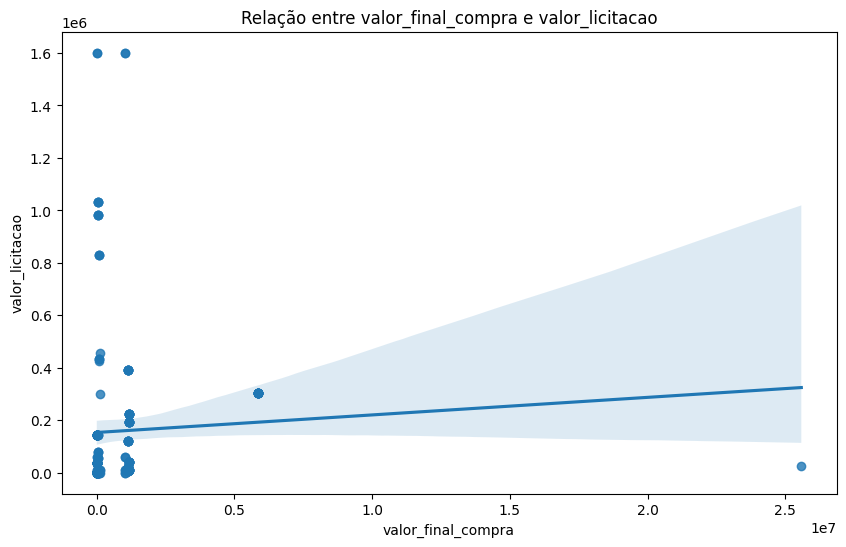

In [ ]:
correlação = df['valor_final_compra'].corr(df['valor_licitacao'])
print(f"A correlação entre  valor_final_compra e valor_licitacao é: {correlação}")
if abs(correlação) > 0.7:
  print("A relação é forte.")
elif abs(correlação) > 0.3:
  print("A relação é moderada.")
else:
  print("A relação é fraca.")
  plt.figure(figsize=(10, 6))
  sns.regplot(x=df['valor_final_compra'], y=df['valor_licitacao'])
  plt.xlabel('valor_final_compra')
  plt.ylabel('valor_licitacao')
  plt.title('Relação entre valor_final_compra e valor_licitacao')
  plt.show()

A correlação entre  valor_final_compra e valor_item é: 0.024162443301623066
A relação é fraca.


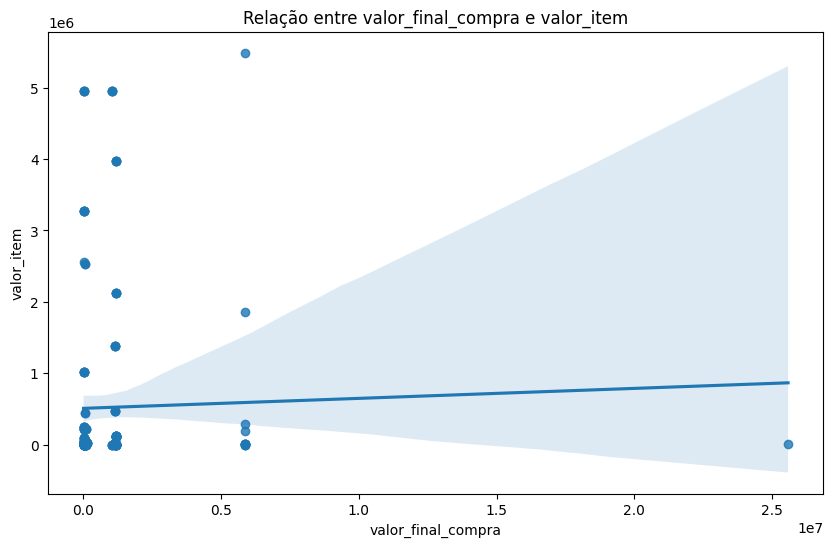

In [ ]:
correlação = df['valor_final_compra'].corr(df['valor_item'])
print(f"A correlação entre  valor_final_compra e valor_item é: {correlação}")
if abs(correlação) > 0.7:
  print("A relação é forte.")
elif abs(correlação) > 0.3:
  print("A relação é moderada.")
else:
  print("A relação é fraca.")
  plt.figure(figsize=(10, 6))
  sns.regplot(x=df['valor_final_compra'], y=df['valor_item'])
  plt.xlabel('valor_final_compra')
  plt.ylabel('valor_item')
  plt.title('Relação entre valor_final_compra e valor_item')
  plt.show()

In [ ]:
grupo_it = df.groupby('descricao_item')['valor_item_unico'].mean().round(2).reset_index()
grupo_it = grupo_it.sort_values('valor_item_unico',ascending=False)
display(grupo_it)

,descricao_item,valor_item_unico
13,Instalacao/Manutencao/Operacao - Eletrica,5492500.0
28,Transporte Rodoviario - Pessoal Por Automoveis,2557900.8
22,Restauração/ Conservacao E Preservacao De Patr...,1385682.99
14,Manutencao / Reforma Predial,1375277.26
17,Obras Civis Publicas ( Construcao ),1305291.72
23,Servico Engenharia,574178.91
16,Obras Civis De Edificacoes Prediais,303294.95
7,Curso Aperfeicoamento / Especializacao Profiss...,46663.92
26,Sistema Energia Solar - Geracao Energia Eletrica,40000.0
0,Acessório/Componente Elétrico Eletrônico,30625.0


In [ ]:
px.bar(grupo_it,y='descricao_item',x='valor_item_unico',title='preço por item')

In [ ]:
grup_org =  df.groupby('nome_orgao_superior')[['valor_licitacao','valor_final_compra']].sum().reset_index()
grup_org['%_valor_licitacao'] = round((grup_org['valor_licitacao'] / grup_org['valor_licitacao'].sum() * 100),2).astype(str) + '%'
grup_org['%_valor_final_compra'] = round((grup_org['valor_final_compra'] / grup_org['valor_final_compra'].sum() *100),2).astype(str) + '%'
grup_org

,nome_orgao_superior,valor_licitacao,valor_final_compra,%_valor_licitacao,%_valor_final_compra
0,Advocacia-Geral Da União,148400.00,8070300.00,0.42%,4.51%
1,Controladoria-Geral Da União,300484.43,138136.80,0.85%,0.08%
2,Ministério Da Agricultura E Pecuária,11193354.98,20630169.20,31.71%,11.53%
3,"Ministério Da Ciência, Tecnologia E Inovaç",44373.00,8070300.00,0.13%,4.51%
4,Ministério Da Defesa,5771988.88,9685173.60,16.35%,5.41%
5,Ministério Da Educação,304982.96,11412782.04,0.86%,6.38%
6,Ministério Da Saúde,320997.44,9352960.00,0.91%,5.23%
7,Ministério De Portos E Aeroportos,430770.00,194400.00,1.22%,0.11%
8,Ministério Do Planejamento E Orçamento,10349449.96,83616048.48,29.32%,46.71%
9,Presidência Da República,6432265.00,27823391.84,18.22%,15.54%


In [ ]:
px.scatter(df,x='valor_final_compra',y='valor_licitacao',color='nome_orgao_superior',title='dispersão por orgão superior')

In [ ]:
px.box(df,x='nome_orgao_superior',y='valor_final_compra',title='boxplot por orgão superior(valor_final_compra)')

In [ ]:
px.box(df,x='nome_orgao_superior',y='valor_licitacao',title='boxplot por orgão superior(valor_licitacao)')

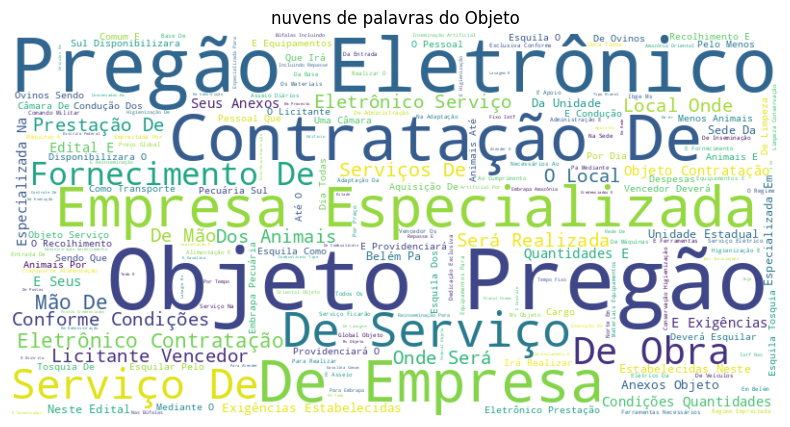

In [ ]:
text = ' '.join(df['objeto'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('nuvens de palavras do Objeto')
plt.show()

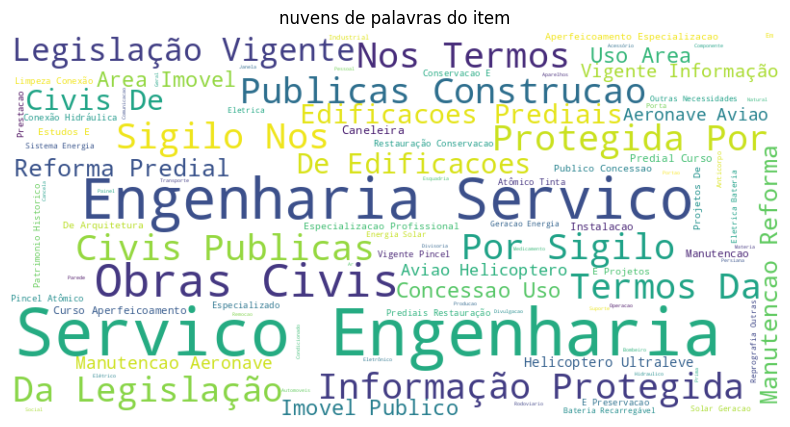

In [ ]:
text = ' '.join(df['descricao_item'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('nuvens de palavras do item')
plt.show()